<a href="https://colab.research.google.com/github/jacmal/spam_detection/blob/main/spam_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import of libraries 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import requests
import io

from sklearn.feature_extraction.text import CountVectorizer as CV
from sklearn.model_selection import train_test_split as tts

from sklearn.naive_bayes import MultinomialNB as MNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# downloading the dataset 
url="https://raw.githubusercontent.com/jacmal/spam_detection/main/emails.csv"
site = requests.get(url).content

# creating a dataframe 
df = pd.read_csv(io.StringIO(site.decode('utf-8')))
df.head(2)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1


In [3]:
# shuffle dataset
df = df.sample(frac = 1)

In [4]:
print(df.shape)

(5728, 2)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5728 entries, 2340 to 4176
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 134.2+ KB
None


In [6]:
# checking spam / not spam (ham) messages 
spam = df[df['spam']==1]
nspam = df[df['spam']==0]

In [7]:
print('spam: ',spam.shape)
print('other: ',nspam.shape)

spam:  (1368, 2)
other:  (4360, 2)


In [8]:
print('Spam Percentage: ', round(len(spam)/len(df)*100, 4), '%')

Spam Percentage:  23.8827 %


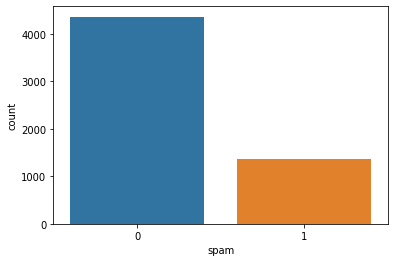

In [9]:
sns.countplot(x=df['spam'], label='Spam vs. Other');

In [28]:
# crate training set (70% of all data)
train_size = int(len(df['text'])*0.7)
train = df.iloc[0:train_size,:]
print(train.shape)
train

(4009, 2)


,text,spam
2340,Subject: interview schedule for yingquan shen ...,0
1949,Subject: howard & lawrence for vince hey vinc...,0
3562,Subject: talon vince : here is the document ...,0
962,Subject: cell phone weather service for outdoo...,1
1406,"Subject: class proposal by yannis hi vince , ...",0
...,...,...
2225,Subject: re : re : workshop this is great new...,0
3103,"Subject: re : hi : zeigham , mike roberts fr...",0
5017,Subject: re : var vince thanks for the updat...,0
3445,Subject: updated electricity homepage ( great ...,0


In [29]:
# create the test set
test = df.iloc[train_size:,:]
print(test.shape)
test

(1719, 2)


,text,spam
1672,"Subject: re : term project : dear vince , i ...",0
2140,Subject: move to the research area hi shalesh...,0
898,Subject: leading in affordable healthcare . . ...,1
5315,Subject: mscf speaker series mscf speaker ser...,0
4386,Subject: short term private firm model : stati...,0
...,...,...
643,Subject: otc live ' s new home run oil stock o...,1
5373,Subject: position report for dual trigger prod...,0
349,Subject: take a look at this microcap benelux...,1
5522,"Subject: ne gov . johanns mtg vince , fyi on ...",0


In [12]:
# create text vectorizer object
vectorizer = CV()

In [23]:
type(vectorizer)

sklearn.feature_extraction.text.CountVectorizer

In [25]:
# transforming text into vectors 
v_train = vectorizer.fit_transform(train['text'])
print(v_train.shape)

(4009, 31951)


In [26]:
# create training sets
X_train = v_train.toarray()
print("X_train: ",X_train.shape)
y_train = train['spam'].values
print("y_train: ",y_train.shape)

X_train:  (4009, 31951)
y_train:  (4009,)


In [30]:
# transforming text into vectors (test data sets)
v_test = vectorizer.transform(test['text'])
print("Test data set shape: ",v_test.shape)

Test data set shape:  (1719, 31951)


In [31]:
# create testing sets
X_test = v_test.toarray()
print("X_test: ",X_test.shape)
y_test = test['spam'].values
print("y_test: ",y_test.shape)

X_test:  (1719, 31951)
y_test:  (1719,)


In [17]:
# create Multinomial Naive Bayes Classifier
clf_mnb = MNB()
clf_mnb.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
# create predicted y set
y_pred_mnb = clf_mnb.predict(X_test)

In [19]:
# classification report
print(classification_report(y_test, y_pred_mnb))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1324
           1       0.98      0.98      0.98       395

    accuracy                           0.99      1719
   macro avg       0.99      0.99      0.99      1719
weighted avg       0.99      0.99      0.99      1719



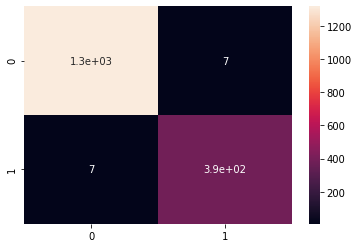

In [20]:
# create the confusion matrix and plot it
conf_matrix = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(conf_matrix, annot=True);

In [21]:
# print mnb model score
print('Score: ',round(accuracy_score(y_test, y_pred_mnb)*100, 4), '%')

Score:  99.1856 %
